In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


###### X_MLP/W11_L1-dip-iitm: [K-means clustering on digit dataset](https://www.youtube.com/watch?v=-tPSKI9nUf0&list=PLyGVjd4KQp13HB4vo0f_ztrpR8dPrDNKP&index=77)

# K-means clustering on digit dataset

In this notebook, we will implement k-means algorithm using `sklearn`.

## Imports

In [2]:
import matplotlib.pyplot as plt

# KMeans clustering
from sklearn.cluster import KMeans

# Loading the digit dataset
from sklearn.datasets import load_digits

# Selecting k through silhoutte score.
from sklearn.metrics import silhouette_score

# Normalization through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

## Clustering of digits

We will use digit dataset for clustering, which is loaded through `load_digit` API.
- It loads 8x8 digit images with approx. 180 samples per class.
- From 10 classes, it has total of 1797 images.
- Each pixel has value between 0 and 16.

In [3]:
digits = load_digits()

Some of the important parameters are as follows:
- init
- n_init
- max_iter
- random_state


Since `KMeans` algorithm is susceptible to local minima, we perform multiple `KMeans` fit and select the ones with the lowest value of sum of squared error.

The total number of times, we would like to run KMeans algorithm is specified through `n_init` parameter.

`max_iter` specifies total number of iterations to perform before declaring the convergence.

Let's define parameters of KMeans clustering algorithm in a dictionary object:

In [4]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 50, 
    "max_iter": 500, 
    "random_state": 0,
}

Let's define a `pipeline` with two stages:
- preprocessing for feature scaling with `MinMaxScaler`
- clustering with `KMeans` clstering algorithm.

In [5]:
pipeline = Pipeline([("preprocessing", MinMaxScaler()),
                     ("clustering", KMeans(n_clusters=10, **kmeans_kwargs))])
pipeline.fit(digits.data)

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

The cluster centroids can be accessed via `cluster_centres_` member variable of `KMeans` class

In [6]:
cluster_centers = pipeline[-1].cluster_centers_

Let's display cluster centroids:

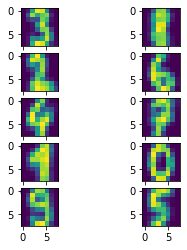

In [7]:
# displaying centroids
fig, ax = plt.subplots(5, 2, figsize=(4,4))
for i, j in zip(ax.flat, cluster_centers.reshape(10,8,8)):
    i.imshow(j)

in this case, the number of clusters were known. Hence we set k=10 and got the clusters.

For deciding the optimal number of clusters through elbow and silhouette, we will pretend that we do not know the number of clusters in the data and we will try to discover the optimal number of clusters through these methods one by one:

## Elbow method

ere we keep track of sum-of-squared error (SSE) in a list for each value of k.

In [8]:
# Identifying the correct number of clusters
sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    sse_digit.append(kmeans.inertia_)

Note that the SSE for a given clustering output is obtained through `inertia_` member variable.

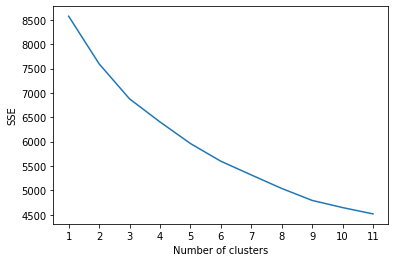

In [9]:
plt.plot(range(1, 12), sse_digit)
plt.xticks(range(1, 12))
plt.xlabel("Number of clusters")
plt.ylabel("SSE");

## Silhouette

In [10]:
sil_coef_digits = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append(score)

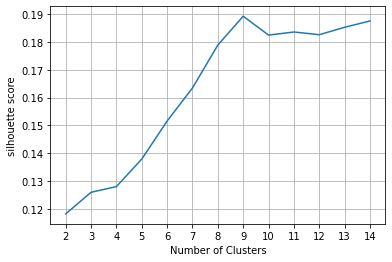

In [11]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.grid(True);

In [12]:
# get the value of K for which
# silhouette coefficient is highest
print(np.argmax(sil_coef_digits)+2)

9
